<a href="https://colab.research.google.com/github/pursh2002/Machine-learning-with-Siraj-Raval-sept-2019..-Dr-Purshottam/blob/master/pneumonia_detection_Inception_V3_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = 'pursh2002'
os.environ['KAGGLE_KEY'] = 'xxxxxxx'


In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 1.14G/1.15G [00:18<00:00, 42.7MB/s]
100% 1.15G/1.15G [00:18<00:00, 66.5MB/s]


In [7]:
ls

drive/  sample_data/


References https://github.com/anjanatiha/ , https://developers.google.com/machine-learning/practica/image-classification/exercise-3, https://doi.org/10.1016/j.cell.2018.02.010

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [6]:
!ls 

drive  sample_data


In [0]:
import os
os.environ['KAGGLE_USERNAME'] = 'pursh2002'
os.environ['KAGGLE_KEY'] = 'be1b3c2fd4a369f219099c961a5ca2bd'

In [9]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 1.14G/1.15G [00:17<00:00, 68.5MB/s]
100% 1.15G/1.15G [00:17<00:00, 69.4MB/s]


In [11]:
ls

chest-xray-pneumonia.zip  drive/  sample_data/


In [10]:
!unzip chest-xray-pneumonia.zip
!unzip chest_xray.zip

Archive:  chest-xray-pneumonia.zip
  inflating: chest_xray.zip          
Archive:  chest_xray.zip
   creating: chest_xray/
  inflating: chest_xray/.DS_Store    
   creating: __MACOSX/
   creating: __MACOSX/chest_xray/
  inflating: __MACOSX/chest_xray/._.DS_Store  
   creating: chest_xray/test/
  inflating: chest_xray/test/.DS_Store  
   creating: __MACOSX/chest_xray/test/
  inflating: __MACOSX/chest_xray/test/._.DS_Store  
   creating: chest_xray/test/PNEUMONIA/
  inflating: chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg  
   creating: __MACOSX/chest_xray/test/PNEUMONIA/
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person147_bacteria_706.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_482.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person78_bacteria_382.jpeg  
  inflating: chest_xray/test/PNEUMONIA/

In [11]:
ls

chest_xray/               chest_xray.zip  __MACOSX/
chest-xray-pneumonia.zip  drive/          sample_data/


In [0]:
import os
import cv2
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt

In [12]:
ls chest_xray/

test/  train/  val/


In [50]:
!ls chest_xray/train

NORMAL	PNEUMONIA


In [51]:
!ls chest_xray/test

NORMAL	PNEUMONIA


In [0]:
path_train = '/content/chest_xray/train'
path_test = '/content/chest_xray/test'
path_val = '/content/chest_xray/val'



In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

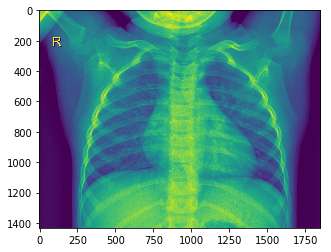

In [65]:
img = mpimg.imread(path_train + '/NORMAL/IM-0223-0001.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [0]:
!pip install -q keras

In [0]:
import numpy as np

from IPython.display import clear_output

%matplotlib inline

In [0]:
positive_class_folder_name = "PNEUMONIA"
negative_class_folder_name = "NORMAL"

In [0]:
def plot_images(path, labeled=False, max_images=6):
  amount = 0
  fig = plt.figure(figsize=(12, 6))

  for file in os.listdir(path):
    if file.endswith('.jpeg'):
      if amount == max_images:
        break

      img = mpimg.imread(os.path.join(path, file))
      plt.subplot(231+amount)
      if labeled:
        plt.title(file.split('_')[1])
      imgplot = plt.imshow(img)

      amount += 1

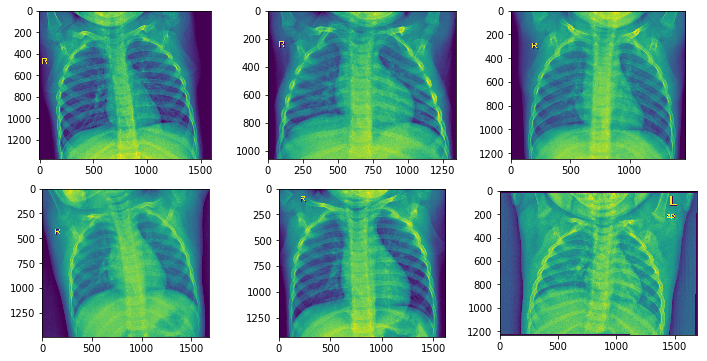

In [74]:
plot_images(path_train + '/NORMAL')

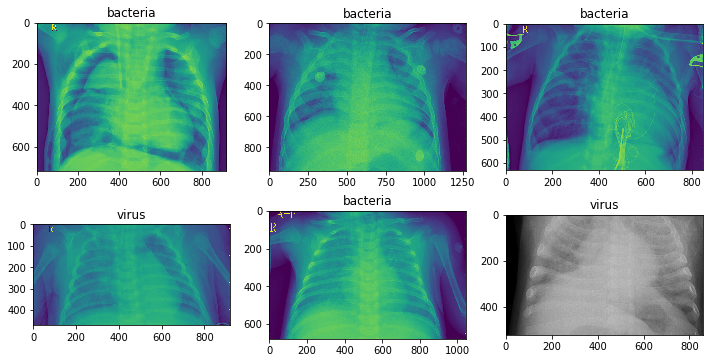

In [78]:
plot_images(path_train + '/PNEUMONIA', labeled=True)

In [0]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

In [81]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2019-09-24 22:47:22--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  57.3MB/s    in 1.5s    

2019-09-24 22:47:23 (57.3 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [85]:
last_layer = pre_trained_model.get_layer('mixed7')
print ('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


In [86]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [141]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 #Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        path_test, # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

train_generator = train_datagen.flow_from_directory(
        path_train, # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        path_val,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 624 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [143]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/2
100/100 - 50s - loss: 0.1697 - acc: 0.9260 - val_loss: 4.9862 - val_acc: 0.5000
Epoch 2/2
100/100 - 46s - loss: 0.1677 - acc: 0.9329 - val_loss: 5.0266 - val_acc: 0.5000


In [0]:
from tensorflow.keras.optimizers import SGD

unfreeze = False

# Unfreeze all models after "mixed6"
for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

# As an optimizer, here we will use SGD 
# with a very low learning rate (0.00001)
model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.00001, 
                  momentum=0.9),
              metrics=['acc'])

In [145]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/10
100/100 - 59s - loss: 0.1725 - acc: 0.9310 - val_loss: 5.0244 - val_acc: 0.5000
Epoch 2/10
100/100 - 45s - loss: 0.1760 - acc: 0.9305 - val_loss: 5.0317 - val_acc: 0.5000
Epoch 3/10
100/100 - 50s - loss: 0.1661 - acc: 0.9359 - val_loss: 5.0277 - val_acc: 0.5000
Epoch 4/10
100/100 - 49s - loss: 0.1785 - acc: 0.9319 - val_loss: 5.0640 - val_acc: 0.5000
Epoch 5/10
100/100 - 50s - loss: 0.1766 - acc: 0.9300 - val_loss: 5.0189 - val_acc: 0.5000
Epoch 6/10
100/100 - 50s - loss: 0.1817 - acc: 0.9280 - val_loss: 4.9775 - val_acc: 0.5000
Epoch 7/10
100/100 - 48s - loss: 0.1784 - acc: 0.9330 - val_loss: 5.0252 - val_acc: 0.5000
Epoch 8/10
100/100 - 49s - loss: 0.1542 - acc: 0.9419 - val_loss: 5.0716 - val_acc: 0.5000
Epoch 9/10
100/100 - 49s - loss: 0.1712 - acc: 0.9339 - val_loss: 5.0024 - val_acc: 0.5000
Epoch 10/10
100/100 - 49s - loss: 0.1788 - acc: 0.9290 - val_loss: 4.9609 - val_acc: 0.5000


Text(0.5, 1.0, 'Training and validation loss')

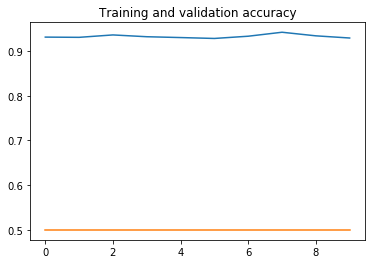

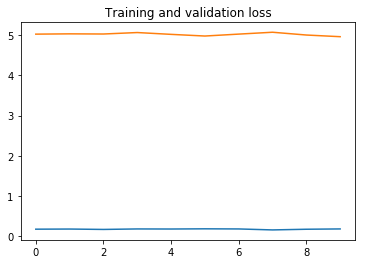

In [146]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [147]:
result  = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)
print('Loss:', result[0])
print('Accuracy:', result[1])

32/32 [==============================] - 8s 246ms/step - loss: 3.9349 - acc: 0.6314
Loss: 3.934945695102215
Accuracy: 0.63141024


In [148]:
from sklearn.metrics import classification_report


yhat = model.predict_generator(test_generator,
                                 steps = len(test_generator),
                                 verbose = 0)  
mask = yhat > 0.5
yhat[mask] = 1
yhat[~mask] = 0

y = test_generator.classes

target_names = [positive_class_folder_name, negative_class_folder_name]
print(classification_report(y, yhat, target_names = target_names))

              precision    recall  f1-score   support

   PNEUMONIA       0.50      0.01      0.02       234
      NORMAL       0.63      0.99      0.77       390

    accuracy                           0.62       624
   macro avg       0.56      0.50      0.39       624
weighted avg       0.58      0.62      0.49       624

